<a href="https://colab.research.google.com/github/BatiSlyme/excercise1/blob/master/fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!!nvidia-smi

['Sun Jun 13 14:04:04 2021       ',
 '+-----------------------------------------------------------------------------+',
 '| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |',
 '|-------------------------------+----------------------+----------------------+',
 '| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |',
 '| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |',
 '|                               |                      |               MIG M. |',
 '|===============================+======================+======================|',
 '|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |',
 '| N/A   37C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |',
 '|                               |                      |                  N/A |',
 '+-------------------------------+----------------------+----------------------+',
 '                                      

In [5]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 36kB/s 


In [6]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [8]:

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset/train'
valid_path = '/content/drive/MyDrive/Dataset/test'

In [9]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [10]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False
    #false because we are using a transfer leaarning technique

In [11]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Dataset/train/*')

In [12]:
folders

['/content/drive/MyDrive/Dataset/train/Apple Golden 1',
 '/content/drive/MyDrive/Dataset/train/Apple Red 1',
 '/content/drive/MyDrive/Dataset/train/Apple Red Yellow 1',
 '/content/drive/MyDrive/Dataset/train/Avocado',
 '/content/drive/MyDrive/Dataset/train/Banana',
 '/content/drive/MyDrive/Dataset/train/Blueberry',
 '/content/drive/MyDrive/Dataset/train/Cherry 1',
 '/content/drive/MyDrive/Dataset/train/Chestnut',
 '/content/drive/MyDrive/Dataset/train/Clementine',
 '/content/drive/MyDrive/Dataset/train/Cocos',
 '/content/drive/MyDrive/Dataset/train/Grape White',
 '/content/drive/MyDrive/Dataset/train/Lemon',
 '/content/drive/MyDrive/Dataset/train/Kiwi',
 '/content/drive/MyDrive/Dataset/train/Mango Red',
 '/content/drive/MyDrive/Dataset/train/Peach',
 '/content/drive/MyDrive/Dataset/train/Plum',
 '/content/drive/MyDrive/Dataset/train/Tomato 1',
 '/content/drive/MyDrive/Dataset/train/Strawberry']

In [13]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)
#softmax is used for multiple categories
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)#scaling option only apply scaling to the batch data set

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 8809 images belonging to 18 classes.


In [19]:

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 2953 images belonging to 18 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
551/551 [==============================] - 2800s 5s/step - loss: 0.6096 - accuracy: 0.9453 - val_loss: 0.3868 - val_accuracy: 0.9719
Epoch 2/10
551/551 [==============================] - 1154s 2s/step - loss: 0.1921 - accuracy: 0.9866 - val_loss: 0.8037 - val_accuracy: 0.9665
Epoch 3/10
551/551 [==============================] - 1133s 2s/step - loss: 0.0993 - accuracy: 0.9933 - val_loss: 1.7149 - val_accuracy: 0.9550
Epoch 4/10
551/551 [==============================] - 1146s 2s/step - loss: 0.1380 - accuracy: 0.9938 - val_loss: 2.6650 - val_accuracy: 0.9208
Epoch 5/10
551/551 [==============================] - 1137s 2s/step - loss: 0.2018 - accuracy: 0.9913 - val_loss: 0.1886 - val_accuracy: 0.9858
Epoch 6/10
551/551 [==============================] - 1127s 2s/step - loss: 0.0629 - accuracy: 0.9967 - val_loss: 1.1289 - val_accuracy: 0.9573
Epoch 7/10
551/551 [==============================] - 1117s 2s/step - loss: 0.1701 - accuracy: 0.9939 - val_loss: 0.4523 - val_accuracy:

In [22]:
import matplotlib.pyplot as plt

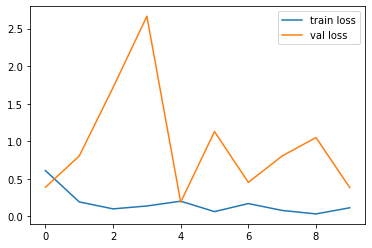

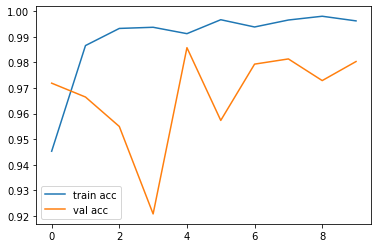

<Figure size 432x288 with 0 Axes>

In [23]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [34]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [35]:
y_pred = model.predict(test_set)

In [36]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [37]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [38]:
y_pred


array([4, 9, 7, ..., 7, 3, 0])